# 1. Welcome to 6.006


*   Solve computational problems
*   Prove correctness
*   Argue efficiency



#Efficiency analysis with Sorting Algorithms

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import timeit
import numpy as np
import time

Definition of each sorting algorithm for this test:

In [ ]:
def selection_sort(arr):
    n = len(arr)
    for i in range(n-1):
        min_index = i
        for j in range(i+1, n):
            if arr[j] < arr[min_index]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

def heap_sort(arr):
    def heapify(arr, n, i):
        largest = i
        l = 2 * i + 1
        r = 2 * i + 2

        if l < n and arr[l] > arr[largest]:
            largest = l

        if r < n and arr[r] > arr[largest]:
            largest = r

        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]
            heapify(arr, n, largest)

    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

def counting_sort(arr):
    max_val = max(arr)
    count = [0] * (max_val + 1)
    for num in arr:
        count[num] += 1
    sorted_arr = []
    for i in range(max_val + 1):
        sorted_arr.extend([i] * count[i])
    return sorted_arr

def radix_sort(arr):
    def counting_sort_radix(arr, exp):
        n = len(arr)
        output = [0] * n
        count = [0] * 10

        for i in range(n):
            index = arr[i] // exp
            count[index % 10] += 1

        for i in range(1, 10):
            count[i] += count[i - 1]

        i = n - 1
        while i >= 0:
            index = arr[i] // exp
            output[count[index % 10] - 1] = arr[i]
            count[index % 10] -= 1
            i -= 1

        i = 0
        for i in range(len(arr)):
            arr[i] = output[i]

    max_val = max(arr)
    exp = 1
    while max_val // exp > 0:
        counting_sort_radix(arr, exp)
        exp *= 10

def bucket_sort(arr):
    def insertion_sort_bucket(bucket):
        for i in range(1, len(bucket)):
            key = bucket[i]
            j = i - 1
            while j >= 0 and key < bucket[j]:
                bucket[j + 1] = bucket[j]
                j -= 1
            bucket[j + 1] = key

    max_val = max(arr)
    min_val = min(arr)
    bucket_size = 10
    bucket_count = (max_val - min_val) // bucket_size + 1
    buckets = [[] for _ in range(bucket_count)]
    for num in arr:
        index = (num - min_val) // bucket_size
        buckets[index].append(num)
    for bucket in buckets:
        insertion_sort_bucket(bucket)
    k = 0
    for i in range(bucket_count):
        for j in range(len(buckets[i])):
            arr[k] = buckets[i][j]
            k += 1

Dictionary of each sorting algo.

In [ ]:
algorithms = {
    'Selection Sort': selection_sort,
    'Insertion Sort': insertion_sort,
    'Quick Sort': quick_sort,
    'Heap Sort': heap_sort,
    'Counting Sort': counting_sort,
    'Radix Sort': radix_sort,
    'Bucket Sort': bucket_sort
}

Definition the data sizes

In [ ]:
data_sizes = [100, 500, 1000, 5000, 10000, 50000]

Definition of the plot_complexity function (Graphs and Order)

In [ ]:
import pandas as pd
import random

def plot_sorting_complexity(funcs, sizes):
    times = {func.__name__: [] for func in funcs}

    for size in sizes:
        arr = [random.randint(0, 100) for _ in range(size)]
        for func in funcs:
            setup_code = f"from __main__ import {func.__name__}"
            run_code = f"{func.__name__}({arr})"
            time_taken = timeit.timeit(run_code, setup=setup_code, number=1)
            times[func.__name__].append(time_taken)
            arr = [random.randint(0, 100) for _ in range(size)]

    data = []
    for func, timings in times.items():
        for size, time_taken in zip(sizes, timings):
            data.append({"Algorithm": func, "Size": size, "Time": time_taken})

    df = pd.DataFrame(data)
    plt.figure(figsize=(20, 10))
    sns.lineplot(data=df, x="Size", y="Time", hue="Algorithm")
    plt.title("Comparison of Sorting Algorithms Complexity")
    plt.xlabel("Input Size")
    plt.ylabel("Time Taken (seconds)")
    plt.show()

    for func in funcs:
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=df[df['Algorithm'] == func.__name__], x="Size", y="Time")
        plt.title(f"Complexity of {func.__name__}")
        plt.xlabel("Input Size")
        plt.ylabel("Time Taken (seconds)")
        plt.show()

    sorted_times = sorted([(func, sum(times[func.__name__])) for func in funcs], key=lambda x: x[1])
    print("Order of time complexity (from lowest to highest):")
    for func, total_time in sorted_times:
        print(f"{func.__name__}: {total_time:.6f} seconds")

Results

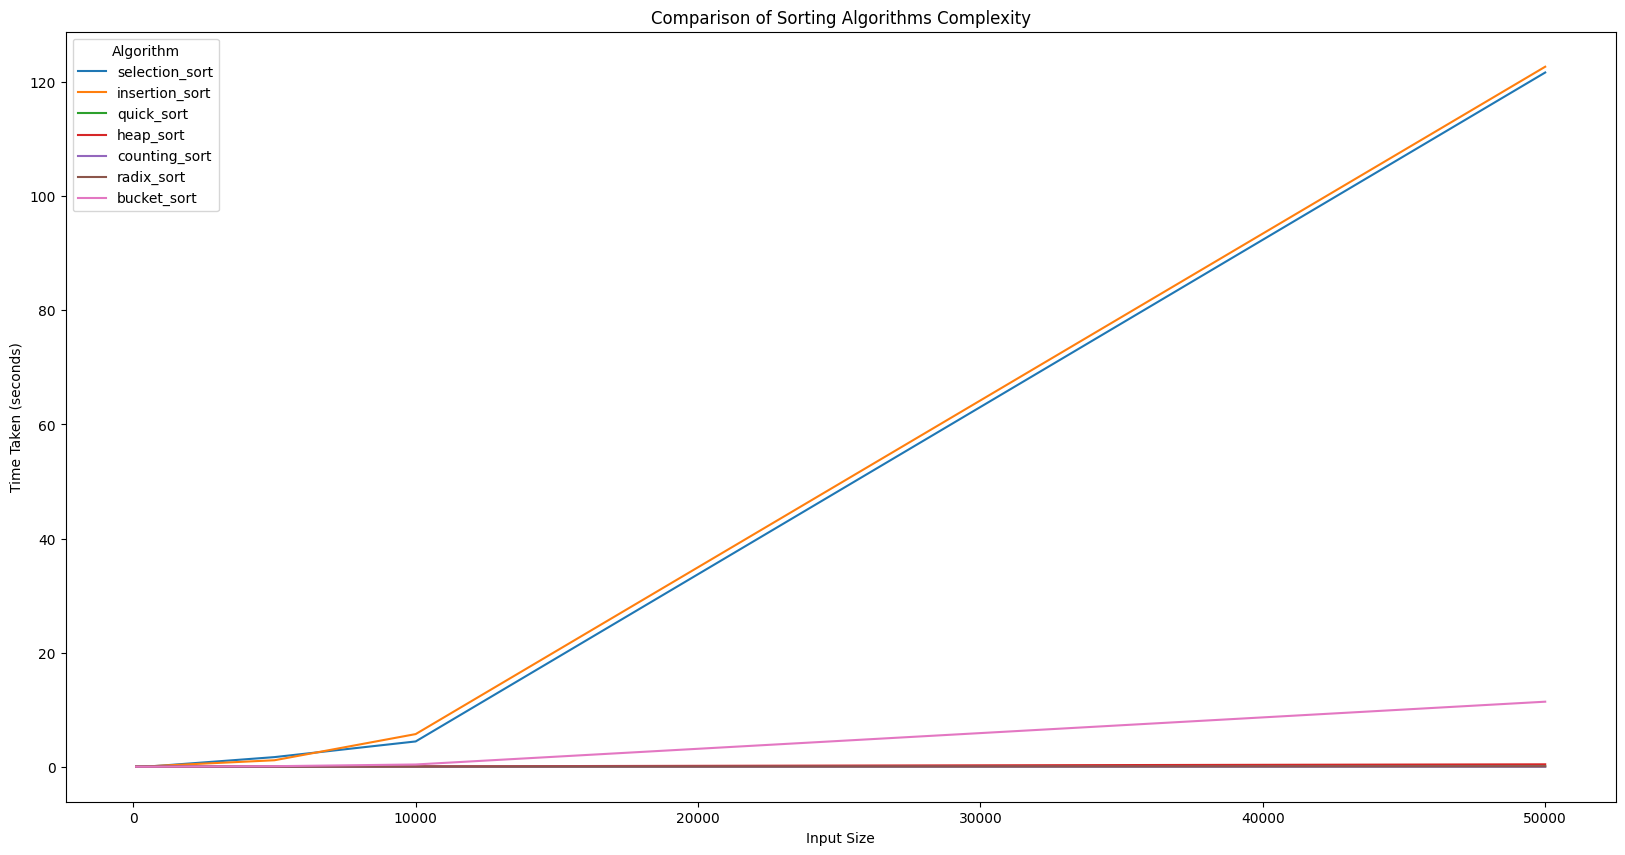

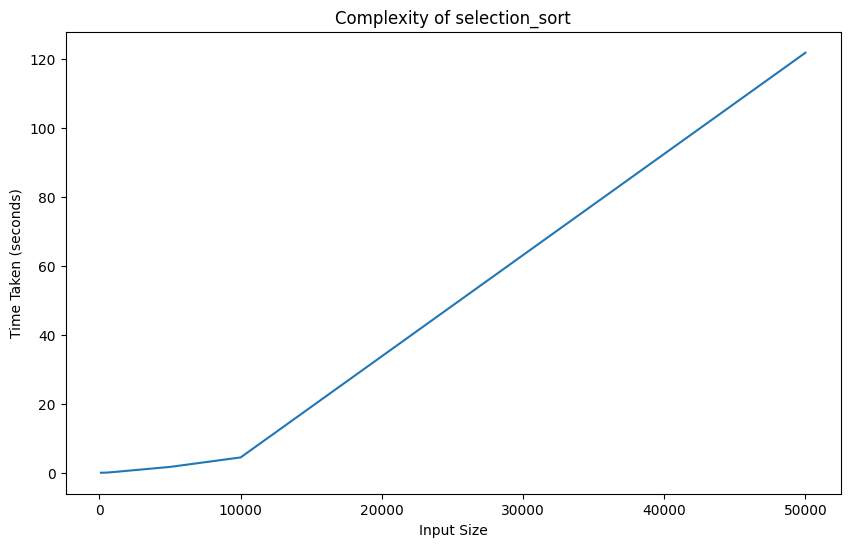

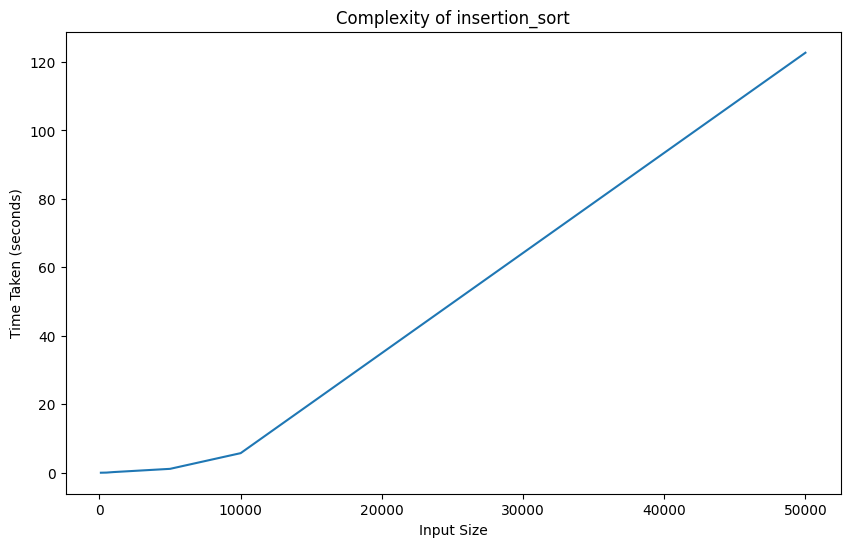

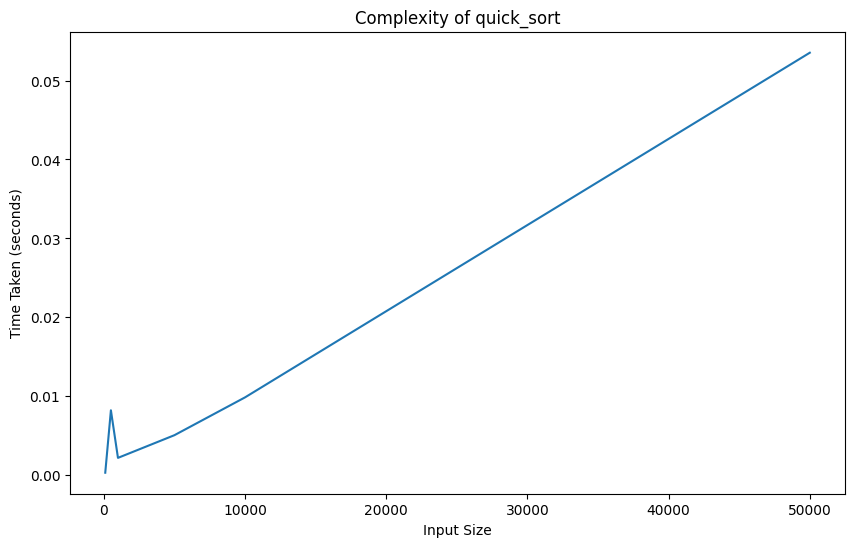

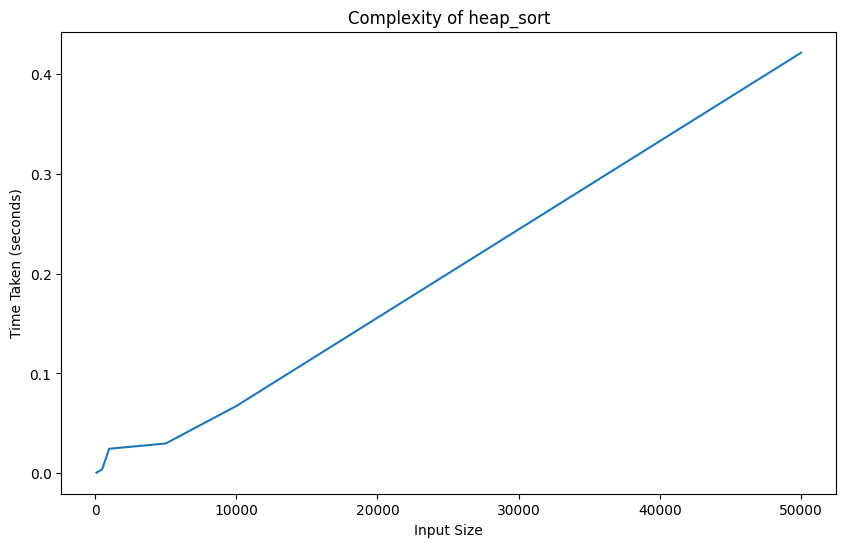

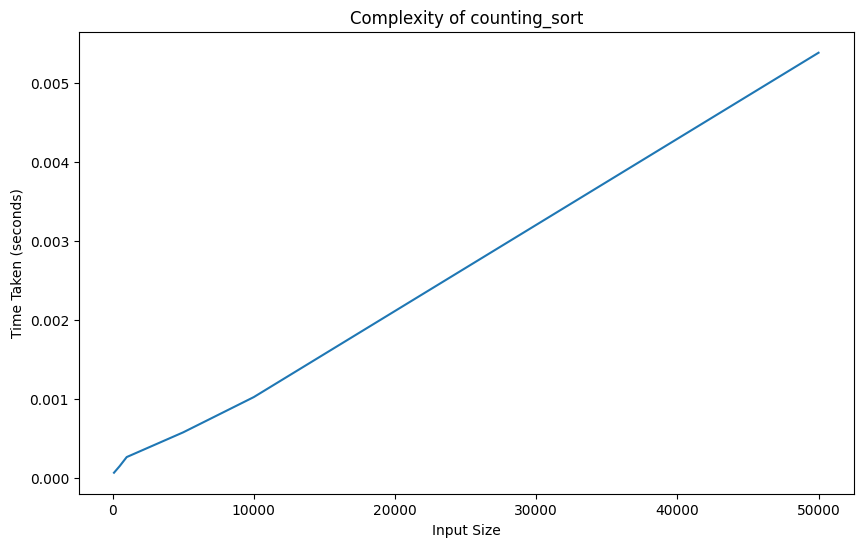

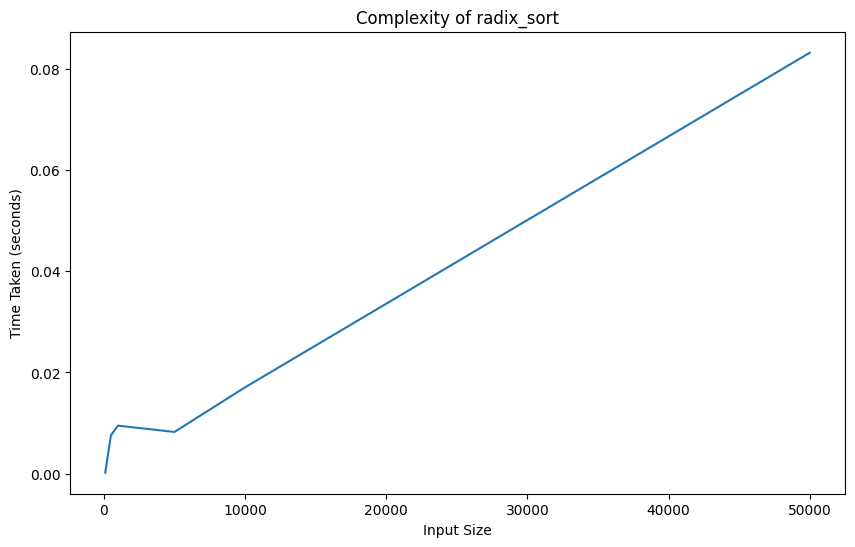

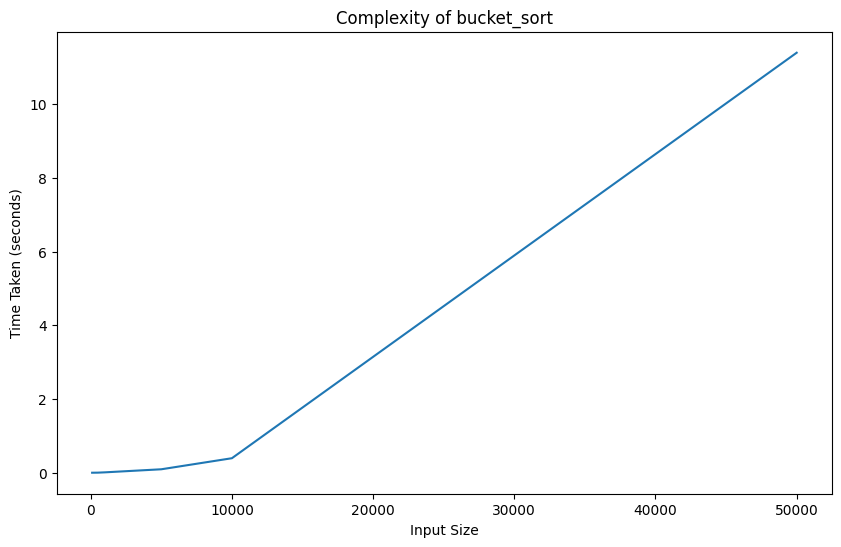

Order of time complexity (from lowest to highest):
counting_sort: 0.007436 seconds
quick_sort: 0.079197 seconds
radix_sort: 0.125743 seconds
heap_sort: 0.547869 seconds
bucket_sort: 11.897492 seconds
selection_sort: 128.025885 seconds
insertion_sort: 129.771720 seconds


In [ ]:
plot_sorting_complexity(algorithms.values(), data_sizes)

#Efficiency analysis with Searching Algorithms

In [ ]:
import math

def linear_search(arr, x):
    for i in range(len(arr)):
        if arr[i] == x:
            return i
    return -1

def sentinel_linear_search(arr, x):
    n = len(arr)
    last = arr[n - 1]
    arr[n - 1] = x
    i = 0
    while arr[i] != x:
        i += 1
    arr[n - 1] = last
    if i < n - 1 or arr[n - 1] == x:
        return i
    return -1

def binary_search(arr, x):
    low, high = 0, len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] < x:
            low = mid + 1
        elif arr[mid] > x:
            high = mid - 1
        else:
            return mid
    return -1

def meta_binary_search(arr, x):
    def binary_search_modified(arr, x, low, high):
        while low <= high:
            mid = (low + high) // 2
            if arr[mid] < x:
                low = mid + 1
            elif arr[mid] > x:
                high = mid - 1
            else:
                return mid
        return -1

    n = len(arr)
    low, high = 0, n - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == x:
            return mid
        elif arr[mid] < x:
            low = mid + 1
        else:
            high = mid - 1

    return binary_search_modified(arr, x, max(0, mid - int(math.sqrt(n))), min(n - 1, mid + int(math.sqrt(n))))

def ternary_search(arr, x):
    def ternary_search_recursive(arr, x, left, right):
        if left > right:
            return -1
        mid1 = left + (right - left) // 3
        mid2 = right - (right - left) // 3
        if arr[mid1] == x:
            return mid1
        elif arr[mid2] == x:
            return mid2
        elif x < arr[mid1]:
            return ternary_search_recursive(arr, x, left, mid1 - 1)
        elif x > arr[mid2]:
            return ternary_search_recursive(arr, x, mid2 + 1, right)
        else:
            return ternary_search_recursive(arr, x, mid1 + 1, mid2 - 1)

    return ternary_search_recursive(arr, x, 0, len(arr) - 1)

def jump_search(arr, x):
    n = len(arr)
    step = int(math.sqrt(n))
    prev = 0
    while arr[min(step, n) - 1] < x:
        prev = step
        step += int(math.sqrt(n))
        if prev >= n:
            return -1
    while arr[prev] < x:
        prev += 1
        if prev == min(step, n):
            return -1
    if arr[prev] == x:
        return prev
    return -1

def interpolation_search(arr, x):
    low, high = 0, len(arr) - 1
    while low <= high and arr[low] <= x <= arr[high]:
        mid = low + ((x - arr[low]) * (high - low)) // (arr[high] - arr[low])
        if arr[mid] == x:
            return mid
        elif arr[mid] < x:
            low = mid + 1
        else:
            high = mid - 1
    return -1

def exponential_search(arr, x):
    if arr[0] == x:
        return 0
    i = 1
    n = len(arr)
    while i < n and arr[i] <= x:
        i *= 2
    return binary_search(arr, x)

def fibonacci_search(arr, x):
    def generate_fibonacci_numbers(n):
        fib = [0, 1]
        while fib[-1] < n:
            fib.append(fib[-1] + fib[-2])
        return fib

    fib = generate_fibonacci_numbers(len(arr))
    offset = 0
    while fib:
        if offset + fib[-1] < len(arr) and arr[offset + fib[-1]] < x:
            offset += fib[-1]
        fib.pop()
    if arr[offset] == x:
        return offset
    return -1

def ubiquitous_binary_search(arr, x):
    def binary_search_modified(arr, x, low, high):
        while low <= high:
            mid = (low + high) // 2
            if arr[mid] < x:
                low = mid + 1
            elif arr[mid] > x:
                high = mid - 1
            else:
                return mid
        return -1

    n = len(arr)
    blockSize = int(math.sqrt(n))
    start = 0
    while start < n and arr[start] <= x:
        start += blockSize
    return binary_search_modified(arr, x, start - blockSize, min(start, n - 1))

In [ ]:
data_sizes = [100, 500, 1000, 5000, 10000]
search_algorithms = {
    'Linear Search': linear_search,
    'Sentinel Linear Search': sentinel_linear_search,
    'Binary Search': binary_search,
    'Meta Binary Search': meta_binary_search,
    'Ternary Search': ternary_search,
    'Jump Search': jump_search,
    'Interpolation Search': interpolation_search,
    'Exponential Search': exponential_search,
    'Fibonacci Search': fibonacci_search,
    'Ubiquitous Binary Search': ubiquitous_binary_search
}

In [ ]:
def measure_time(algorithm, arr, x):
    start_time = time.time()
    algorithm(arr, x)
    end_time = time.time()
    return end_time - start_time

def generate_test_data(size):
    return sorted([random.randint(0, 1000000) for _ in range(size)])

def search_algorithm_analysis(search_algorithms, data_sizes, repetitions):
    data = {algo_name: [] for algo_name in search_algorithms.keys()}

    for size in data_sizes:
        arr = generate_test_data(size)
        x = random.choice(arr)
        for algo_name, algorithm in search_algorithms.items():
            total_time = 0
            for _ in range(repetitions):
                total_time += measure_time(algorithm, arr, x)
            average_time = total_time / repetitions
            data[algo_name].append(average_time)

    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 8))

    for algo_name, times in data.items():
        plt.plot(data_sizes, times, marker='o', label=algo_name)

    plt.title('Comparison of Search Times')
    plt.xlabel('Size of Input Array')
    plt.ylabel('Average Execution Time (seconds)')

    plt.legend()
    plt.xscale('log')
    plt.yscale('log')
    plt.xticks(data_sizes, data_sizes)
    plt.grid(True)
    plt.show()

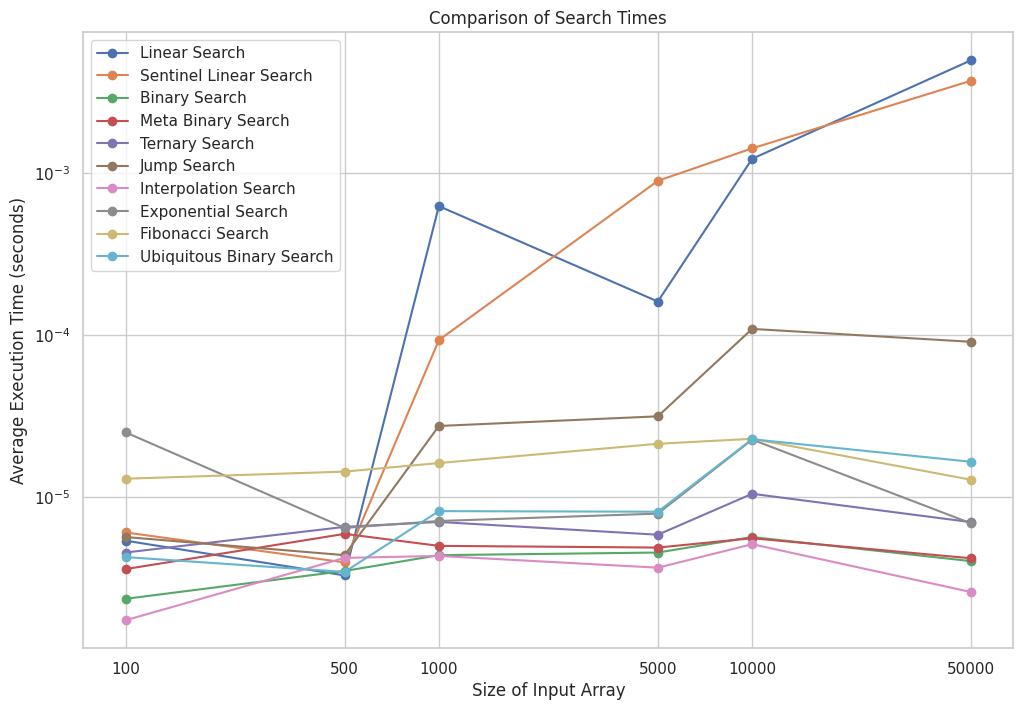

In [ ]:
search_algorithm_analysis(search_algorithms, data_sizes, repetitions=10)